In [1]:
import pandas as pd

In [3]:
df = pd.read_parquet(r"Z:\BSDS3002_GP_GIT\BSDS3002\Part2 - Results\April_latest_artists_with_relations.parquet")

In [4]:
df

,Artist,Spotify Name,Genres,Popularity,Spotify ID,followers,influencers,searched_artist_name
0,Motörhead,Motörhead,"[album rock, hard rock, metal, rock, speed metal]",68.0,1DFr97A9HnbV3SKTJFu62M,"[Alice in Chains, Ween, Iron Maiden, Pantera, ...","[Sex Pistols, The Yardbirds, Ramones, The Stoo...",Motörhead
1,Color Me Badd,Color Me Badd,"[boy band, contemporary r&b, new jack swing, r...",53.0,1QtIfAa6y7w2JhxYJhYeUG,[],"[New Edition, Jodeci, Guy]",Color Me Badd
2,Trumans Water,Trumans Water,[noise rock],7.0,3GQRTA9DtNlGbQqu8ST1Xx,"[No Age, The Fiery Furnaces]","[Sonic Youth, The Plastic People of the Univer...",Trumans Water
3,Cliff Eberhardt,Cliff Eberhardt,[contemporary folk],10.0,1LpAlKD69cCn6ygqov2bGs,[],[Steve Forbert],Cliff Eberhardt
4,The Waitresses,The Waitresses,[new wave pop],40.0,57AKOY1SF1062tuVzgAPv8,[],"[Blondie, Battant]",The Waitresses
...,...,...,...,...,...,...,...,...
9615,Mint Condition,Mint Condition,"[contemporary r&b, funk, hip pop, minneapolis ...",52.0,4MT97VeycuegSicrrphisJ,[],"[Stevie Wonder with B.B. King, The Bar-Kays]",Mint Condition
9616,Prick,Prick,"[industrial metal, industrial rock]",22.0,4hILJw5uchW1ZZJO10icIz,[],[Nine Inch Nails],Prick
9617,Windsor For The Derby,Windsor For The Derby,[tampa indie],23.0,1BlsomJZZh7jhA7IvgS1Al,[],"[Yo La Tengo, Faust, Neu!]",Windsor For The Derby
9618,Little Matador,Little Matador,[belfast indie],2.0,6FeebWsBMCP5p9Ojoa2hGs,[],"[Nirvana, Mercury Rev, Led Zeppelin, The Clash...",Little Matador


In [5]:
import networkx as nx
import pandas as pd
import ast

In [6]:
df = pd.read_parquet(r"Z:\BSDS3002_GP_GIT\BSDS3002\Part2 - Results\April_latest_artists_with_relations.parquet")

In [7]:
df2 = df.head()
df2

,Artist,Spotify Name,Genres,Popularity,Spotify ID,followers,influencers,searched_artist_name
0,Motörhead,Motörhead,"[album rock, hard rock, metal, rock, speed metal]",68.0,1DFr97A9HnbV3SKTJFu62M,"[Alice in Chains, Ween, Iron Maiden, Pantera, ...","[Sex Pistols, The Yardbirds, Ramones, The Stoo...",Motörhead
1,Color Me Badd,Color Me Badd,"[boy band, contemporary r&b, new jack swing, r...",53.0,1QtIfAa6y7w2JhxYJhYeUG,[],"[New Edition, Jodeci, Guy]",Color Me Badd
2,Trumans Water,Trumans Water,[noise rock],7.0,3GQRTA9DtNlGbQqu8ST1Xx,"[No Age, The Fiery Furnaces]","[Sonic Youth, The Plastic People of the Univer...",Trumans Water
3,Cliff Eberhardt,Cliff Eberhardt,[contemporary folk],10.0,1LpAlKD69cCn6ygqov2bGs,[],[Steve Forbert],Cliff Eberhardt
4,The Waitresses,The Waitresses,[new wave pop],40.0,57AKOY1SF1062tuVzgAPv8,[],"[Blondie, Battant]",The Waitresses


In [8]:
G = nx.DiGraph()

for index, row in df2.iterrows():
    G.add_node(row["searched_artist_name"],
               genres=row["Genres"],
               popularity=row["Popularity"],
               spotify_id=row["Spotify ID"])

In [9]:
for index, row in df2.iterrows():
    artist = row["searched_artist_name"]
    
    for influencer in row['influencers']:
        if influencer not in G.nodes:
            G.add_node(influencer)
        G.add_edge(influencer, artist)  # Influencer to artist edge

    for follower in row['followers']:
        if follower not in G.nodes:
            G.add_node(follower)
        G.add_edge(artist, follower)  # Artist to follower edge

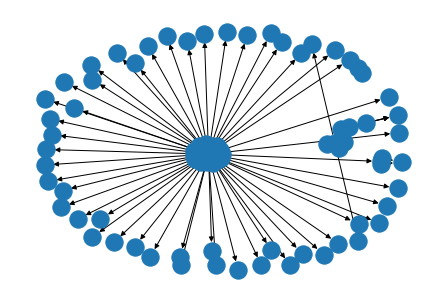

In [10]:
nx.draw(G)

In [11]:
G.edges

OutEdgeView([('Motörhead', 'Alice in Chains'), ('Motörhead', 'Ween'), ('Motörhead', 'Iron Maiden'), ('Motörhead', 'Pantera'), ('Motörhead', 'Celtic Frost'), ('Motörhead', 'Bible of the Devil'), ('Motörhead', 'L7'), ('Motörhead', 'Misfits'), ('Motörhead', 'GG Allin'), ('Motörhead', 'Bathory'), ('Motörhead', 'Sepultura'), ('Motörhead', 'Mudhoney'), ('Motörhead', 'The Sisters of Mercy'), ('Motörhead', 'Metallica'), ('Motörhead', 'Crass'), ('Motörhead', 'Napalm Death'), ('Motörhead', 'Slayer'), ('Motörhead', 'White Zombie'), ('Motörhead', 'The Dead Milkmen'), ('Motörhead', 'Amen'), ('Motörhead', 'Anthrax'), ('Motörhead', 'Blue Snaggletooth'), ('Motörhead', 'Broken Teeth'), ('Motörhead', 'Diamond Head'), ('Motörhead', 'Fu Manchu'), ('Motörhead', 'GBH'), ('Motörhead', "Guns N' Roses"), ('Motörhead', 'Holy Mountain'), ('Motörhead', 'King Diamond'), ('Motörhead', 'Machine Head'), ('Motörhead', 'Megadeth'), ('Motörhead', 'Nashville Pussy'), ('Motörhead', 'Royal Trux'), ('Motörhead', 'The Amazon

In [12]:
G.nodes(data=True)

NodeDataView({'Motörhead': {'genres': array(['album rock', 'hard rock', 'metal', 'rock', 'speed metal'],
      dtype=object), 'popularity': 68.0, 'spotify_id': '1DFr97A9HnbV3SKTJFu62M'}, 'Color Me Badd': {'genres': array(['boy band', 'contemporary r&b', 'new jack swing', 'r&b',
       'urban contemporary'], dtype=object), 'popularity': 53.0, 'spotify_id': '1QtIfAa6y7w2JhxYJhYeUG'}, 'Trumans Water': {'genres': array(['noise rock'], dtype=object), 'popularity': 7.0, 'spotify_id': '3GQRTA9DtNlGbQqu8ST1Xx'}, 'Cliff Eberhardt': {'genres': array(['contemporary folk'], dtype=object), 'popularity': 10.0, 'spotify_id': '1LpAlKD69cCn6ygqov2bGs'}, 'The Waitresses': {'genres': array(['new wave pop'], dtype=object), 'popularity': 40.0, 'spotify_id': '57AKOY1SF1062tuVzgAPv8'}, 'Sex Pistols': {}, 'The Yardbirds': {}, 'Ramones': {}, 'The Stooges': {}, 'Black Sabbath': {}, 'MC5': {}, 'The Damned': {}, 'Deep Purple': {}, 'Blue Cheer': {}, 'Hawkwind': {}, 'Led Zeppelin': {}, 'Steppenwolf': {}, 'The Clash